In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from numpy import mean, std
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

### Aman

In [2]:
dataset = 'https://drive.google.com/uc?export=download&id=1Iv5t0306926yKVw4RFQresK6fqel7R1m'
df = pd.read_csv(dataset)

In [3]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Animal_Type: ['Dog' 'Cat' 'Cow' 'Horse' 'Rabbit' 'Sheep' 'Goat' 'Pig']
Breed: ['Labrador' 'Siamese' 'Holstein' 'Beagle' 'Persian' 'Thoroughbred'
 'German Shepherd' 'Maine Coon' 'Bulldog' 'Jersey' 'Poodle' 'Bengal'
 'Arabian' 'Hereford' 'Chihuahua' 'Ragdoll' 'Siberian Husky' 'Clydesdale'
 'British Shorthair' 'Angus' 'Golden Retriever' 'Russian Blue'
 'Quarter Horse' 'Appaloosa' 'Dachshund' 'Sphynx' 'Abyssinian' 'Brahman'
 'Husky' 'Morgan' 'Limousin' 'Border Collie' 'Devon Rex' 'Standardbred'
 'Red Angus' 'Shire' 'Guernsey' 'Labrador Retriever' 'Scottish Fold'
 'Simmental' 'Rottweiler' 'Siberian' 'American Quarter' 'Shorthorn'
 'Shih Tzu' 'American Curl' 'Percheron' 'Manx' 'Tennessee Walker'
 'Dalmatian' 'Bombay' 'Welsh Pony' 'Brown Swiss' 'Akita' 'Boxer'
 'Holland Lop' 'Merino' 'Boer' 'Yorkshire' 'Mini Rex' 'Suffolk' 'Alpine'
 'Duroc' 'Corgi' 'Burmese' 'Paint' 'Flemish Giant' 'Dorper' 'Nubian'
 'English Angora' 'Cheviot' 'Toggenburg' 'Berkshire' 'Belgian' 'Himalayan'
 'Romney' 'Kiko' 'T

In [4]:
df.head(5)

,Animal_Type,Breed,Age,Gender,Weight,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Duration,...,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Disease_Prediction
0,Dog,Labrador,4,Male,25.0,Fever,Lethargy,Appetite Loss,Vomiting,3 days,...,No,No,No,No,No,No,No,39.5°C,120,Parvovirus
1,Cat,Siamese,2,Female,4.5,Coughing,Sneezing,Eye Discharge,Nasal Discharge,1 week,...,No,Yes,No,No,No,Yes,Yes,38.9°C,150,Upper Respiratory Infection
2,Cow,Holstein,3,Female,600.0,Fever,Nasal Discharge,Labored Breathing,Coughing,5 days,...,No,Yes,Yes,No,No,Yes,No,40.1°C,90,Foot and Mouth Disease
3,Dog,Beagle,1,Male,10.0,Diarrhea,Vomiting,Lethargy,Appetite Loss,2 days,...,Yes,No,No,No,No,No,No,39.2°C,130,Gastroenteritis
4,Cat,Persian,5,Male,3.8,Lethargy,Appetite Loss,Skin Lesions,No,2 weeks,...,No,No,No,No,Yes,No,No,38.7°C,160,Fungal Infection


In [5]:
df.tail(10)

,Animal_Type,Breed,Age,Gender,Weight,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Duration,...,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Disease_Prediction
421,Dog,Labrador,4,Male,25.0,Fever,Lethargy,Appetite Loss,Vomiting,3 days,...,No,No,No,No,No,No,No,39.5°C,120,Parvovirus
422,Cat,Siamese,2,Female,4.5,Coughing,Sneezing,Eye Discharge,Nasal Discharge,1 week,...,No,Yes,No,No,No,Yes,Yes,38.9°C,150,Upper Respiratory Infection
423,Cow,Holstein,3,Female,600.0,Fever,Nasal Discharge,Labored Breathing,Coughing,5 days,...,No,Yes,Yes,No,No,Yes,No,40.1°C,90,Foot and Mouth Disease
424,Dog,Beagle,1,Male,10.0,Diarrhea,Vomiting,Lethargy,Appetite Loss,2 days,...,Yes,No,No,No,No,No,No,39.2°C,130,Gastroenteritis
425,Cat,Persian,5,Male,3.8,Lethargy,Appetite Loss,Skin Lesions,No,2 weeks,...,No,No,No,No,Yes,No,No,38.7°C,160,Fungal Infection
426,Horse,Thoroughbred,6,Female,500.0,Coughing,Labored Breathing,Nasal Discharge,Fever,10 days,...,No,Yes,Yes,No,No,Yes,No,39.8°C,85,Equine Influenza
427,Dog,German Shepherd,3,Female,30.0,Lameness,Fever,Skin Lesions,Lethargy,7 days,...,No,No,No,Yes,Yes,No,No,39.3°C,110,Lyme Disease
428,Cat,Maine Coon,2,Male,6.0,Vomiting,Appetite Loss,Lethargy,Diarrhea,4 days,...,Yes,No,No,No,No,No,No,39.1°C,140,Intestinal Parasites
429,Dog,Bulldog,5,Male,23.0,Labored Breathing,Coughing,Nasal Discharge,Appetite Loss,6 days,...,No,Yes,Yes,No,No,Yes,No,40.0°C,115,Canine Distemper
430,Cow,Jersey,4,Female,580.0,Lethargy,Decreased Milk Yield,Fever,No,8 days,...,No,No,No,No,No,No,No,39.6°C,70,Mastitis


In [6]:
df.isnull().sum()

Animal_Type           0
Breed                 0
Age                   0
Gender                0
Weight                0
Symptom_1             0
Symptom_2             0
Symptom_3             0
Symptom_4             0
Duration              0
Appetite_Loss         0
Vomiting              0
Diarrhea              0
Coughing              0
Labored_Breathing     0
Lameness              0
Skin_Lesions          0
Nasal_Discharge       0
Eye_Discharge         0
Body_Temperature      0
Heart_Rate            0
Disease_Prediction    0
dtype: int64

In [7]:
df['Body_Temperature'] = df['Body_Temperature'].str.replace('°C', '').str.strip().astype(float)

In [8]:
def convert_duration(val):
    if 'week' in val:
        return int(val.split()[0]) * 7
    return int(val.split()[0])

df['Duration'] = df['Duration'].apply(convert_duration)

In [9]:
explicit_symptoms = [
    'Appetite_Loss', 'Vomiting', 'Diarrhea', 'Coughing',
    'Labored_Breathing', 'Lameness', 'Skin_Lesions',
    'Nasal_Discharge', 'Eye_Discharge'
]

col_maps = {col: {'Yes': 1, 'No': 0} for col in explicit_symptoms}
col_maps['Gender'] = {'Male': 1, 'Female': 0}

inverse_maps = {
    col: {v: k for k, v in m.items()}
    for col, m in col_maps.items()
}

col_maps

{'Appetite_Loss': {'Yes': 1, 'No': 0},
 'Vomiting': {'Yes': 1, 'No': 0},
 'Diarrhea': {'Yes': 1, 'No': 0},
 'Coughing': {'Yes': 1, 'No': 0},
 'Labored_Breathing': {'Yes': 1, 'No': 0},
 'Lameness': {'Yes': 1, 'No': 0},
 'Skin_Lesions': {'Yes': 1, 'No': 0},
 'Nasal_Discharge': {'Yes': 1, 'No': 0},
 'Eye_Discharge': {'Yes': 1, 'No': 0},
 'Gender': {'Male': 1, 'Female': 0}}

In [10]:
mapping_cols = ['Appetite_Loss', 'Vomiting', 'Diarrhea', 'Coughing',
    'Labored_Breathing', 'Lameness', 'Skin_Lesions',
    'Nasal_Discharge', 'Eye_Discharge', 'Gender']

for col in mapping_cols:
    df[col] = (
        df[col].astype(str)
               .str.strip()
               .str.capitalize()
               .map(col_maps[col])
               .fillna(-1)
    )

In [11]:
manual_map_cols = ['Animal_Type', 'Breed']

manual_maps = {}

for col in manual_map_cols:
    unique_vals = sorted(df[col].unique())
    mapping = {k: i+1 for i, k in enumerate(unique_vals)}  # mulai dari 1
    df[col] = df[col].map(mapping)
    manual_maps[col] = mapping

inverse_maps = {
    col: {v: k for k, v in mapping.items()}
    for col, mapping in manual_maps.items()
}

In [12]:
symptom_cols = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4']

# Gabungkan semua symptom kolom jadi satu Series
symptom_all = df[symptom_cols].values.ravel()
unique_symptoms = sorted(set(symptom_all) - {'No'})  # Buang 'No' jika dianggap tidak valid

# Buat one-hot kolom untuk setiap gejala unik
for symptom in unique_symptoms:
    df[symptom] = df[symptom_cols].apply(lambda row: int(symptom in row.values), axis=1)

In [13]:
merge_map = {
    'Labored_Breathing': 'Labored Breathing',
    'Appetite_Loss': 'Appetite Loss',
    'Loss of Appetite': 'Appetite Loss',
    'Reduced Appetite': 'Appetite Loss',
    'Nasal_Discharge': 'Nasal Discharge',
    'Eye_Discharge': 'Eye Discharge',
    'Skin_Lesions': 'Skin Lesions',
    'Decreased Milk Yield': 'Milk Yield Issue',
    'Reduced Milk Production': 'Milk Yield Issue',
    'Reduced Wool Growth': 'Wool Issue',
    'Reduced Wool Production': 'Wool Issue',
    'Swollen Legs': 'Swelling',
    'Swollen Joints': 'Swelling',
}

for src_col, target_col in merge_map.items():
    if target_col not in df:
        df[target_col] = 0
    df[target_col] = df[[target_col, src_col]].max(axis=1)

df.drop(columns=merge_map.keys(), inplace=True)

In [14]:
df = df.drop(columns=['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4'])

In [15]:
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)

In [16]:
df['Weight_Norm'] = df.groupby('Animal_Type')['Weight'].transform(
    lambda x: (x - x.mean()) / x.std()
)

In [17]:
df = df.drop(columns=['Weight'])

In [18]:
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)

In [19]:
# Mapping semua 139 Disease_Prediction secara eksplisit
infection_mapping = {
    "Actinobacillus Pleuropneumonia": "Bacterial",
    "Actinobacillus Suis": "Bacterial",
    "African Swine Fever": "Viral",
    "Allergic Rhinitis": "Clinical",
    "Arthritis": "Clinical",
    "Blue Tongue": "Viral",
    "Blue Tongue Disease": "Viral",
    "Blue Tongue Virus": "Viral",
    "Bluetongue": "Viral",
    "Bluetongue Virus": "Viral",
    "Bordetella Infection": "Bacterial",
    "Bovine Coccidiosis": "Other Infectious",
    "Bovine Influenza": "Viral",
    "Bovine Johne's Disease": "Bacterial",
    "Bovine Leukemia Virus": "Viral",
    "Bovine Mastitis": "Bacterial",
    "Bovine Parainfluenza": "Viral",
    "Bovine Pneumonia": "Respiratory",
    "Bovine Respiratory Disease": "Respiratory",
    "Bovine Respiratory Disease Complex": "Respiratory",
    "Bovine Respiratory Syncytial Virus": "Viral",
    "Bovine Tuberculosis": "Bacterial",
    "Bovine Viral Diarrhea": "Viral",
    "Canine Cough": "Respiratory",
    "Canine Distemper": "Viral",
    "Canine Flu": "Viral",
    "Canine Heartworm Disease": "Other Infectious",
    "Canine Hepatitis": "Viral",
    "Canine Infectious Hepatitis": "Viral",
    "Canine Influenza": "Viral",
    "Canine Leptospirosis": "Bacterial",
    "Canine Parvovirus": "Viral",
    "Caprine Arthritis": "Clinical",
    "Caprine Arthritis Encephalitis": "Viral",
    "Caprine Arthritis Encephalitis Virus": "Viral",
    "Caprine Pleuropneumonia": "Bacterial",
    "Caprine Respiratory Disease": "Respiratory",
    "Caprine Viral Arthritis": "Viral",
    "Caseous Lymphadenitis": "Bacterial",
    "Chlamydia in Sheep": "Bacterial",
    "Chronic Bronchitis": "Respiratory",
    "Coccidiosis": "Other Infectious",
    "Conjunctivitis": "Clinical",
    "Contagious Abortion": "Bacterial",
    "Contagious Ecthyma": "Viral",
    "Cryptosporidiosis": "Other Infectious",
    "Degenerative Joint Disease": "Clinical",
    "Distemper": "Viral",
    "Enteritis": "Clinical",
    "Equine Arthritis": "Clinical",
    "Equine Cushing's Disease": "Other Infectious",
    "Equine Encephalitis": "Viral",
    "Equine Encephalomyelitis": "Viral",
    "Equine Herpesvirus": "Viral",
    "Equine Infectious Anemia": "Viral",
    "Equine Influenza": "Viral",
    "Equine Influenza Virus": "Viral",
    "Equine Laminitis": "Clinical",
    "Equine Leptospirosis": "Bacterial",
    "Equine Lyme Disease": "Bacterial",
    "Equine Metabolic Syndrome": "Other Infectious",
    "Equine Osteoarthritis": "Clinical",
    "Equine Piroplasmosis": "Other Infectious",
    "Equine Pneumonia": "Respiratory",
    "Equine Protozoal Myeloencephalitis": "Other Infectious",
    "Equine Rhinopneumonitis": "Viral",
    "Equine Viral Arteritis": "Viral",
    "Equine West Nile Virus": "Viral",
    "Feline Asthma": "Respiratory",
    "Feline Calicivirus": "Viral",
    "Feline Chlamydia": "Bacterial",
    "Feline Chlamydiosis": "Bacterial",
    "Feline Coronavirus": "Viral",
    "Feline Herpesvirus": "Viral",
    "Feline Immunodeficiency Virus": "Viral",
    "Feline Infectious Peritonitis": "Viral",
    "Feline Leukemia": "Viral",
    "Feline Leukemia Virus": "Viral",
    "Feline Panleukopenia": "Viral",
    "Feline Panleukopenia Virus": "Viral",
    "Feline Renal Disease": "Clinical",
    "Feline Respiratory Disease Complex": "Respiratory",
    "Feline Respiratory Infection": "Respiratory",
    "Feline Rhinotracheitis": "Viral",
    "Feline Upper Respiratory Infection": "Respiratory",
    "Feline Viral Rhinotracheitis": "Viral",
    "Foot and Mouth Disease": "Viral",
    "Foot-and-Mouth Disease": "Viral",
    "Footrot": "Bacterial",
    "Fungal Infection": "Other Infectious",
    "Gastroenteritis": "Clinical",
    "Gastrointestinal Infection": "Clinical",
    "Gastrointestinal Stasis": "Clinical",
    "Giardiasis": "Other Infectious",
    "Goat Pox": "Viral",
    "Heartworm Disease": "Other Infectious",
    "Hyperthyroidism": "Other Infectious",
    "Inflammatory Bowel Disease": "Clinical",
    "Intestinal Parasites": "Other Infectious",
    "Johne's Disease": "Bacterial",
    "Kennel Cough": "Respiratory",
    "Laminitis": "Clinical",
    "Leptospirosis": "Bacterial",
    "Lyme Disease": "Bacterial",
    "Maedi-Visna": "Viral",
    "Mastitis": "Bacterial",
    "Myxomatosis": "Viral",
    "Pancreatitis": "Clinical",
    "Panleukopenia": "Viral",
    "Parvovirus": "Viral",
    "Pasteurellosis": "Bacterial",
    "Pneumonia": "Respiratory",
    "Porcine Circovirus Disease": "Viral",
    "Porcine Epidemic Diarrhea": "Viral",
    "Porcine Epidemic Diarrhea Virus": "Viral",
    "Porcine Reproductive and Respiratory Syndrome": "Viral",
    "Porcine Respiratory Disease Complex": "Respiratory",
    "Rabbit Calicivirus": "Viral",
    "Rabbit Hemorrhagic Disease": "Viral",
    "Rabbit Syphilis": "Bacterial",
    "Rabbit Viral Hemorrhagic Disease": "Viral",
    "Respiratory Infection": "Respiratory",
    "Respiratory Syncytial Virus": "Viral",
    "Ringworm": "Other Infectious",
    "Salmonellosis": "Bacterial",
    "Scrapie": "Viral",
    "Scrapie Disease": "Viral",
    "Snuffles": "Respiratory",
    "Strangles": "Bacterial",
    "Swine Dysentery": "Bacterial",
    "Swine Erysipelas": "Bacterial",
    "Swine Fever": "Viral",
    "Swine Flu": "Viral",
    "Swine Influenza": "Viral",
    "Tick-Borne Disease": "Bacterial",
    "Tuberculosis": "Bacterial",
    "Upper Respiratory Infection": "Respiratory",
    "Viral Hemorrhagic Disease": "Viral",
    "West Nile Virus": "Viral"
}

# Cek jumlah mapping
assert len(infection_mapping) == 139, f"Expected 139, got {len(infection_mapping)}"

In [20]:
df['infection_type'] = df['Disease_Prediction'].map(infection_mapping).fillna('Not Sure')
df['infection_type'].value_counts()

infection_type
Viral               227
Bacterial            81
Respiratory          60
Clinical             33
Other Infectious     20
Name: count, dtype: int64

In [21]:
le = LabelEncoder()

df['infection_type'] = le.fit_transform(df['infection_type'])

disease_label_map = dict(zip(le.classes_, le.transform(le.classes_)))
inverse_disease_map = dict(zip(le.transform(le.classes_), le.classes_))

inverse_disease_map

{0: 'Bacterial',
 1: 'Clinical',
 2: 'Other Infectious',
 3: 'Respiratory',
 4: 'Viral'}

In [22]:
# Deteksi semua kolom biner (isinya hanya 0 dan 1)
binary_cols = [col for col in df.columns if set(df[col].unique()) <= {0, 1}]

# Konversi ke tipe bool
df[binary_cols] = df[binary_cols].astype(bool)

In [23]:
df.rename(columns={
    'Appetite Loss': 'appetite_loss',
    'Eye Discharge': 'eye_discharge',
    'Fever': 'fever',
    'Labored Breathing': 'labored_breathing',
    'Lethargy': 'lethargy',
    'Nasal Discharge': 'nasal_discharge',
    'Reduced Mobility': 'reduced_mobility',
    'Skin Lesions': 'skin_lesions',
    'Sneezing': 'sneezing',
    'Swelling': 'swelling',
    'Weight Loss': 'weight_loss',
    'Milk Yield Issue': 'milk_yield_issue',
    'Wool Issue': 'wool_issue',
    'Animal_Type': 'animal_type',
    'Breed': 'breed',
    'Age': 'age',
    'Gender': 'gender',
    'Duration': 'duration',
    'Vomiting': 'vomiting',
    'Diarrhea': 'diarrhea',
    'Coughing': 'coughing',
    'Lameness': 'lameness',
    'Body_Temperature': 'body_temperature',
    'Heart_Rate': 'heart_rate',
    'Weight_Norm': 'weight_norm',
    'Dehydration': 'dehydration'
}, inplace=True)

In [24]:
df = df.drop(columns=['Disease_Prediction'])

In [25]:
df = df.drop(columns=['body_temperature', 'breed', 'weight_norm', 'heart_rate'])

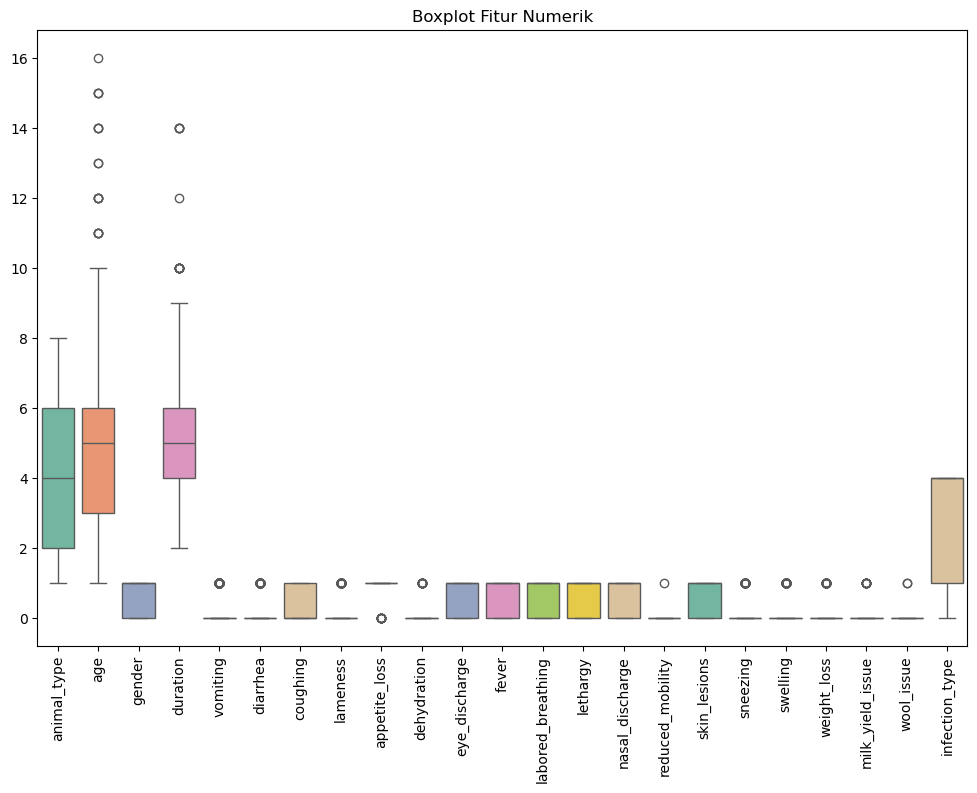

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='Set2')
plt.title('Boxplot Fitur Numerik')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Simpan semua kolom
df_all = df.copy()

# Pilih hanya kolom numerik untuk deteksi outlier
df_num = df_all.select_dtypes(include=['int64', 'float64'])

# Hitung batas IQR
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Mask baris dengan outlier di salah satu kolom numerik
mask_outliers = ((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)

# Hapus baris tersebut dari dataframe asli
df = df_all[~mask_outliers].reset_index(drop=True)

### Eksperimen

### Cek

In [28]:
df

,animal_type,age,gender,duration,vomiting,diarrhea,coughing,lameness,appetite_loss,dehydration,...,lethargy,nasal_discharge,reduced_mobility,skin_lesions,sneezing,swelling,weight_loss,milk_yield_issue,wool_issue,infection_type
0,3,4,True,3,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,4
1,1,2,False,7,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,3
2,2,3,False,5,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,4
3,3,1,True,2,True,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,1
4,3,3,False,7,False,False,False,True,True,False,...,True,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,3,5,True,4,False,False,True,False,True,False,...,True,True,False,False,False,False,False,False,False,4
390,3,4,True,5,True,False,False,False,True,False,...,True,True,False,False,False,False,False,False,False,4
391,1,3,False,4,False,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,4
392,5,5,True,7,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,4


In [29]:
correlation = df.corr(numeric_only=True)
cor_target = correlation['infection_type'].sort_values(ascending=False)
cor_target

infection_type       1.000000
nasal_discharge      0.129629
skin_lesions         0.105525
sneezing             0.104256
animal_type          0.088562
fever                0.070424
lameness             0.054706
wool_issue           0.054096
appetite_loss        0.047261
swelling             0.039458
coughing             0.031919
eye_discharge        0.011381
vomiting             0.007530
gender              -0.016304
lethargy            -0.058041
diarrhea            -0.060305
labored_breathing   -0.079900
age                 -0.081152
reduced_mobility    -0.086969
dehydration         -0.108804
duration            -0.113751
weight_loss         -0.167364
milk_yield_issue    -0.196609
Name: infection_type, dtype: float64

In [30]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

animal_type: [3 1 2 5 7 8 4 6]
age: [ 4  2  3  1  5  8  6  7  9 10]
gender: [ True False]
duration: [3 7 5 2 4 6 8 9]
vomiting: [ True False]
diarrhea: [False  True]
coughing: [False  True]
lameness: [False  True]
appetite_loss: [ True False]
dehydration: [False  True]
eye_discharge: [False  True]
fever: [ True False]
labored_breathing: [False  True]
lethargy: [ True False]
nasal_discharge: [False  True]
reduced_mobility: [False  True]
skin_lesions: [False  True]
sneezing: [False  True]
swelling: [False  True]
weight_loss: [False  True]
milk_yield_issue: [False  True]
wool_issue: [False  True]
infection_type: [4 3 1 0 2]


In [31]:
print(df.nunique())

animal_type           8
age                  10
gender                2
duration              8
vomiting              2
diarrhea              2
coughing              2
lameness              2
appetite_loss         2
dehydration           2
eye_discharge         2
fever                 2
labored_breathing     2
lethargy              2
nasal_discharge       2
reduced_mobility      2
skin_lesions          2
sneezing              2
swelling              2
weight_loss           2
milk_yield_issue      2
wool_issue            2
infection_type        5
dtype: int64


In [32]:
df.dtypes

animal_type          int64
age                  int64
gender                bool
duration             int64
vomiting              bool
diarrhea              bool
coughing              bool
lameness              bool
appetite_loss         bool
dehydration           bool
eye_discharge         bool
fever                 bool
labored_breathing     bool
lethargy              bool
nasal_discharge       bool
reduced_mobility      bool
skin_lesions          bool
sneezing              bool
swelling              bool
weight_loss           bool
milk_yield_issue      bool
wool_issue            bool
infection_type       int64
dtype: object

### Corr Filter

In [33]:
correlation = df.corr(numeric_only=True)
corr_filter = correlation['infection_type'].drop('infection_type').sort_values(ascending=False)
corr_filter = corr_filter[abs(corr_filter) >= 0.05]
corr_filter

nasal_discharge      0.129629
skin_lesions         0.105525
sneezing             0.104256
animal_type          0.088562
fever                0.070424
lameness             0.054706
wool_issue           0.054096
lethargy            -0.058041
diarrhea            -0.060305
labored_breathing   -0.079900
age                 -0.081152
reduced_mobility    -0.086969
dehydration         -0.108804
duration            -0.113751
weight_loss         -0.167364
milk_yield_issue    -0.196609
Name: infection_type, dtype: float64

In [34]:
df = df[corr_filter.index.tolist() + ['infection_type']]

df.duplicated().value_counts()
df = df.drop_duplicates()
df

,nasal_discharge,skin_lesions,sneezing,animal_type,fever,lameness,wool_issue,lethargy,diarrhea,labored_breathing,age,reduced_mobility,dehydration,duration,weight_loss,milk_yield_issue,infection_type
0,False,False,False,3,True,False,False,True,False,False,4,False,False,3,False,False,4
1,True,False,True,1,False,False,False,False,False,False,2,False,False,7,False,False,3
2,True,False,False,2,True,False,False,False,False,True,3,False,False,5,False,False,4
3,False,False,False,3,False,False,False,True,True,False,1,False,False,2,False,False,1
4,False,True,False,3,True,True,False,True,False,False,3,False,False,7,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,True,False,False,3,True,False,False,True,False,False,5,False,False,4,False,False,4
390,True,False,False,3,True,False,False,True,False,False,4,False,False,5,False,False,4
391,True,False,True,1,True,False,False,False,False,False,3,False,False,4,False,False,4
392,True,False,False,5,True,True,False,False,False,True,5,False,False,7,False,False,4


In [35]:
print(df.nunique())

nasal_discharge       2
skin_lesions          2
sneezing              2
animal_type           8
fever                 2
lameness              2
wool_issue            2
lethargy              2
diarrhea              2
labored_breathing     2
age                  10
reduced_mobility      2
dehydration           2
duration              8
weight_loss           2
milk_yield_issue      2
infection_type        5
dtype: int64


In [36]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

nasal_discharge: [False  True]
skin_lesions: [False  True]
sneezing: [False  True]
animal_type: [3 1 2 5 7 8 4 6]
fever: [ True False]
lameness: [False  True]
wool_issue: [False  True]
lethargy: [ True False]
diarrhea: [False  True]
labored_breathing: [False  True]
age: [ 4  2  3  1  5  8  6  7  9 10]
reduced_mobility: [False  True]
dehydration: [False  True]
duration: [3 7 5 2 4 6 8 9]
weight_loss: [False  True]
milk_yield_issue: [False  True]
infection_type: [4 3 1 0 2]


In [37]:
df.dtypes

nasal_discharge       bool
skin_lesions          bool
sneezing              bool
animal_type          int64
fever                 bool
lameness              bool
wool_issue            bool
lethargy              bool
diarrhea              bool
labored_breathing     bool
age                  int64
reduced_mobility      bool
dehydration           bool
duration             int64
weight_loss           bool
milk_yield_issue      bool
infection_type       int64
dtype: object

### Split Data

In [38]:
y=pd.DataFrame(df['infection_type'])
X=df.drop(['infection_type'],axis=1)

In [39]:
feature_order = [
    "animal_type",
    "age",
    "duration",
    "dehydration",
    "weight_loss",
    "diarrhea",
    "fever",
    "labored_breathing",
    "sneezing",
    "nasal_discharge",
    "lethargy",
    "reduced_mobility",
    "skin_lesions",
    "wool_issue",
    "lameness",
    "milk_yield_issue"
]

y = df["infection_type"]
X = df[feature_order].copy()

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=42,stratify=y)

In [41]:
df['infection_type'].value_counts()

infection_type
4    197
0     76
3     56
1     25
2     16
Name: count, dtype: int64

In [42]:
y_train.value_counts()

infection_type
4    177
0     68
3     51
1     23
2     14
Name: count, dtype: int64

In [43]:
y_test.value_counts()

infection_type
4    20
0     8
3     5
1     2
2     2
Name: count, dtype: int64

### Random Forest

In [44]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train.values.ravel())
y_test_enc = le.transform(y_test.values.ravel())

In [45]:
rf_params = dict(
    class_weight='balanced',
    criterion='entropy',
    min_samples_split=5,
    n_estimators=300,
    max_depth=50,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

In [46]:
kfold_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
rf_model = RandomForestClassifier(**rf_params)
scores_cv = cross_val_score(rf_model, X_train, y_train_enc, scoring='accuracy', cv=kfold_cv)
print(scores_cv)
mean_cv = mean(scores_cv)
std_cv = std(scores_cv)
print('Acc: %.8f (%.8f)' % (mean_cv, std_cv))

[0.3880597  0.50746269 0.40298507 0.51515152 0.40909091]
Acc: 0.44454998 (0.05498859)


In [47]:
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(
#     estimator=rf_model,
#     param_grid=param_grid,
#     cv=kfold_cv,
#     scoring='accuracy',
#     verbose=2,
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train.values.ravel())

In [48]:
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train_enc)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, min_samples_split=5, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [49]:
joblib.dump(rf_model, "rf_model.pkl")

# Simpan urutan fitur
joblib.dump(feature_order, "model_features.pkl")

# Simpan mapping kategorikal
joblib.dump(manual_maps, "manual_maps.pkl")
joblib.dump(col_maps, "col_maps.pkl")

# Simpan inverse label untuk prediksi output
joblib.dump(inverse_disease_map, "inverse_maps.pkl")

['inverse_maps.pkl']

In [50]:
rfpred = rf_model.predict(X_test)
rfpred

array([1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 0, 0, 4, 4, 3, 4, 3, 1,
       4, 4, 3, 4, 4, 4, 0, 4, 4, 3, 4, 4, 4, 4, 4])

In [51]:
accuracy_rf = accuracy_score(y_test_enc, rfpred)
accuracy_rf

0.5945945945945946

In [52]:
rf_tree = rf_model.estimators_[0]

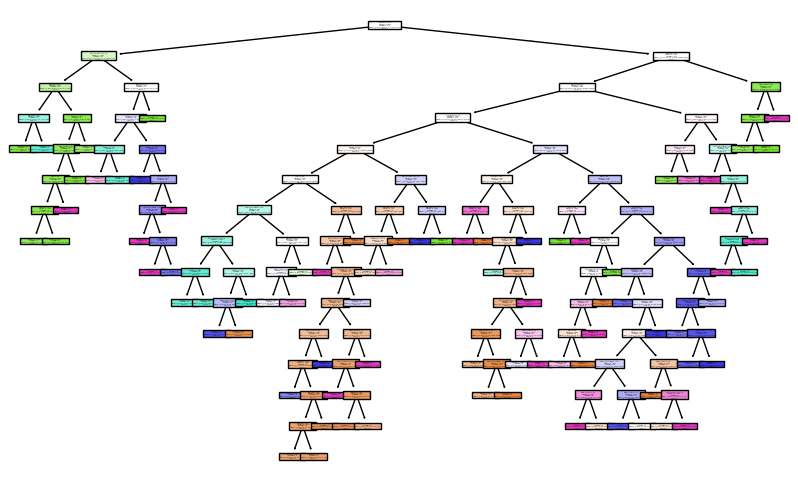

In [53]:
plt.figure(figsize=(10,6))
class_names_rf2 = [str(cls) for cls in np.unique(y_train)]
_ = tree.plot_tree(rf_tree, class_names=class_names_rf2, feature_names=X_train.columns, filled=True)

In [54]:
print(classification_report(y_test_enc, rfpred, zero_division=0))

              precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         2
           3       0.43      0.60      0.50         5
           4       0.64      0.80      0.71        20

    accuracy                           0.59        37
   macro avg       0.48      0.51      0.48        37
weighted avg       0.53      0.59      0.55        37



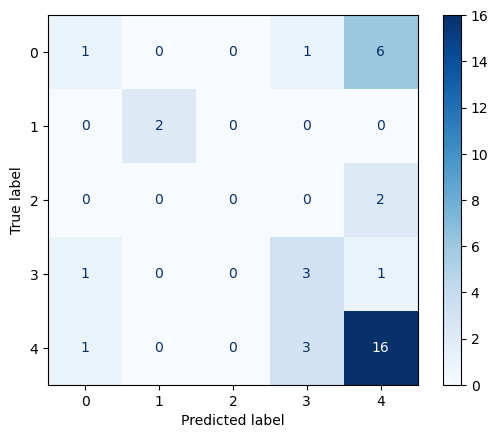

In [55]:
confusion_matrix_rf = confusion_matrix(y_test_enc, rfpred, labels=sorted(df['infection_type'].unique()))
cm_display_rf2= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf)
cm_display_rf2.plot(cmap=plt.cm.Blues)
plt.show()